In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv('/content/drive/MyDrive/Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [14]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [15]:
from sklearn.preprocessing import PolynomialFeatures
X_poly = df[['area']]
y_poly = df['price']


In [16]:
from sklearn.model_selection import train_test_split
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y_poly, test_size=0.2, random_state=0)

In [17]:
reg = PolynomialFeatures(degree=4)
X_train_poly_transformed = reg.fit_transform(X_train_poly)
X_test_poly_transformed = reg.transform(X_test_poly)

In [18]:
from sklearn.linear_model import LinearRegression
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_train_poly_transformed,y_train_poly)

LinearRegression()

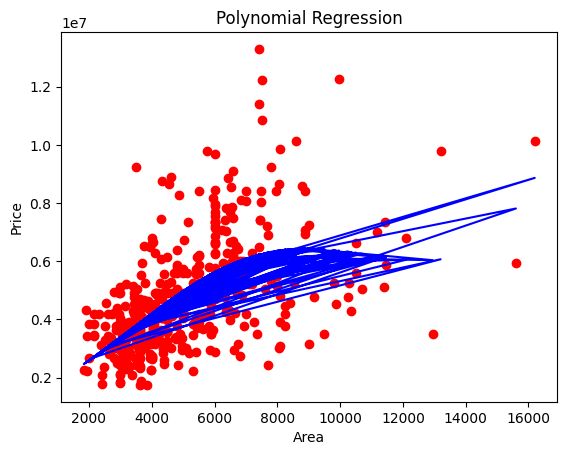

In [19]:
plt.scatter(X_train_poly, y_train_poly, color='red')
plt.plot(X_train_poly, lin_reg_2.predict(X_train_poly_transformed), color='blue')
plt.title('Polynomial Regression')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

In [20]:
from sklearn.metrics import r2_score
r2_poly = r2_score(y_test_poly, lin_reg_2.predict(X_test_poly_transformed))
print(r2_poly)

0.3397615944502539
